## Customer churn, the discontinuation of business with a company, is a critical challenge in various industries, and task is to predict it accurately. 

### Importing Required Libraries

In [92]:
import pandas as pd
import numpy as np

### Reading CSV File

In [93]:
# Reading data file
df = pd.read_csv("Customer_Churn.csv")

print("Dataset is:\n")

df

Dataset is:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 1. Exploratory Data Analysis (EDA)

### Seeing the Columns of Dataset

**Dataset Overview:** 

The dataset contains the following columns: 

- `customerID`: Customer ID 
- `gender`: Customer's gender 
- `SeniorCitizen`: Whether the customer is a senior citizen (1 for yes, 0 for no) 
- `Partner`: Whether the customer has a partner 
- `Dependents`: Whether the customer has dependents 
- `tenure`: Number of months the customer has stayed with the company 
- `PhoneService`: Whether the customer has phone service 
- `MultipleLines`: Whether the customer has multiple phone lines 
- `InternetService`: Type of internet service 
- `OnlineSecurity`: Whether the customer has online security 
- `OnlineBackup`: Whether the customer has online backup 
- `DeviceProtection`: Whether the customer has device protection 
- `TechSupport`: Whether the customer has tech support 
- `StreamingTV`: Whether the customer streams TV 
- `StreamingMovies`: Whether the customer streams movies 
- `Contract`: Type of contract (e.g., month-to-month, one year, two years) 
- `PaperlessBilling`: Whether the customer uses paperless billing 
- `PaymentMethod`: Payment method (e.g., electronic check, mailed check) 
- `MonthlyCharges`: Monthly charges 
- `TotalCharges`: Total charges 
- `Churn`: Target variable, indicating whether the customer churned (1 for yes, 0 for no)

In [94]:
print("Columns of Dataset are:\n", df.columns)

print("\nShape of Dataset is:", df.shape)

Columns of Dataset are:
 Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Shape of Dataset is: (7043, 21)


### Checking the Data types of Columns

In [95]:
# Total Count of Datatypes
print("Datatype of Dataset is:\n")
df.info()

# According to Columns
data_types = df.dtypes

print("\nDatatypes of Columns is:\n")
print(data_types)

Datatype of Dataset is:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling 

### Converting Total Charges to float64

In [96]:
# Replace empty strings or whitespace with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now convert the column to float64
df['TotalCharges'] = df['TotalCharges'].astype('float64')

### Seeing Descriptive Statics of Dataset

In [97]:
print("Descriptive Statics of Dataset are:\n")

df.describe(include = 'all')

Descriptive Statics of Dataset are:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500,NaN


### Checking for Null Values in Dataset

In [98]:
print("Count of Null Values in Dataset is:\n")
df.isnull().sum()

Count of Null Values in Dataset is:



customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Removing Null values

In [99]:
df.dropna(inplace = True)

### No Missing Values Present in dataset

### Seeing Object Columns

In [100]:
# Printing Object columns

for i in df.columns:
    
    if df[i].dtype == 'object':
        
        print(f"\nColumn {i} is:\n")
        print(df[i])


Column customerID is:

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7032, dtype: object

Column gender is:

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7032, dtype: object

Column Partner is:

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7032, dtype: object

Column Dependents is:

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7032, dtype: object

Column PhoneService is:

0        No
1       Yes
2       Yes
3        No
4       Yes
       ...

## Data Visualization on Dataset

In [101]:
# Reloading Libraries as it is not plotting using the default style specified
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Histogram of Various Integer/Float Columns

### **Insights From the Plot**

### **_Senior Citizen_**

- Senior Citizen is a categorical column and most of the value is 0 meaning that most people are not senior citizens.
- Senior Citizens are in lesser Number in comparison.

### **_Tenure_**

- Most Customers stay for less than 5 month- 10 month.
- Some customers are also having  a high tenure of 70 months.

### **_Monthly Charges_**

- Customers mostly pay lesser monthly charges or we can say customers who pay lesser monthly charges are in more number.
- Customers paying high monthly charges are in lesser number.

### **_Total Charges_**

- Customers mostly pay lesser monthly charges or we can say customers who pay lesser monthly charges are in more number.
- Customers paying high monthly charges are in lesser number.
- Distribution is Right Skewed.

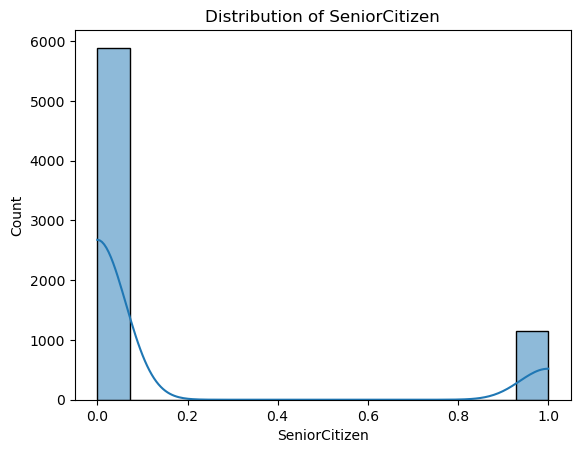

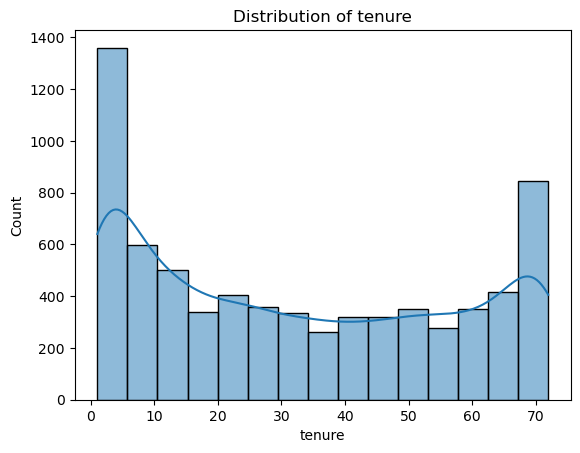

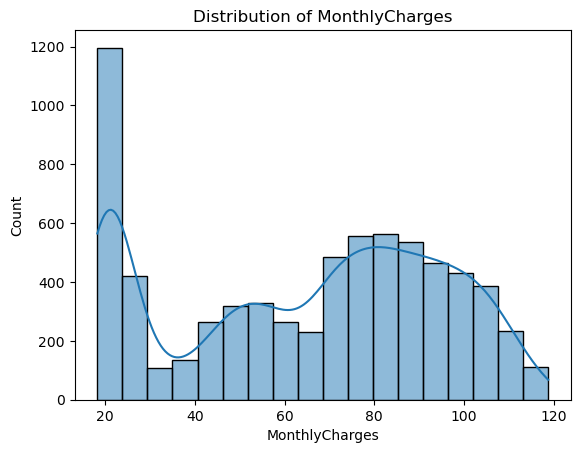

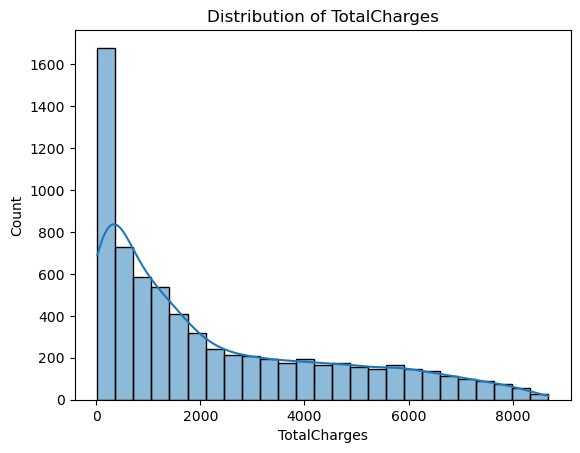

In [102]:
for i in df.columns:
    
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.title(f"Distribution of {i}")
        plt.show()

### 2. Box Plot of Various Integer/Float Columns

### **Insights From the Plot**


### **_Tenure_**

- Most Customers stay for less than 5 month- 10 month.
- Some customers are also having  a high tenure of 70 months.

### **_Monthly Charges_**

- Customers mostly pay lesser monthly charges or we can say customers who pay lesser monthly charges are in more number.
- Customers paying high monthly charges are in lesser number.

### **_Total Charges_**

- Customers mostly pay lesser monthly charges or we can say customers who pay lesser monthly charges are in more number.
- Customers paying high monthly charges are in lesser number.
- Distribution is Right Skewed.

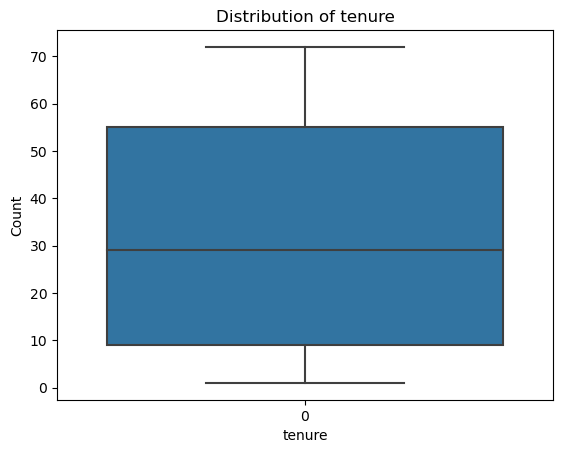

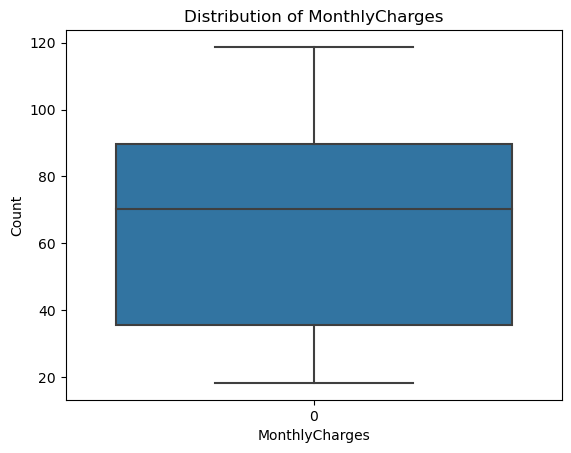

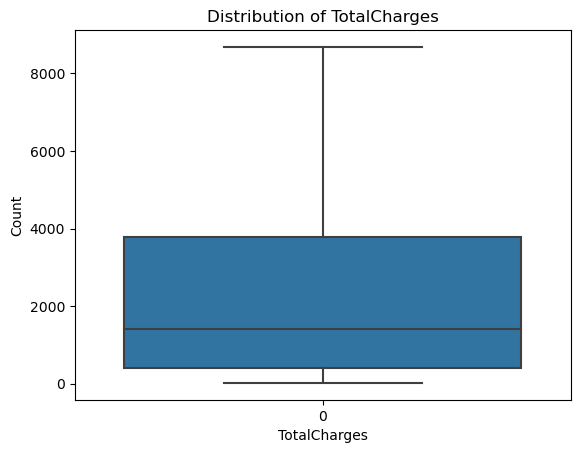

In [103]:
Numerical_Columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for i in Numerical_Columns:
    
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.title(f"Distribution of {i}")
        plt.show()

### Transformting Total charges

In [104]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

### Histogram after transforming

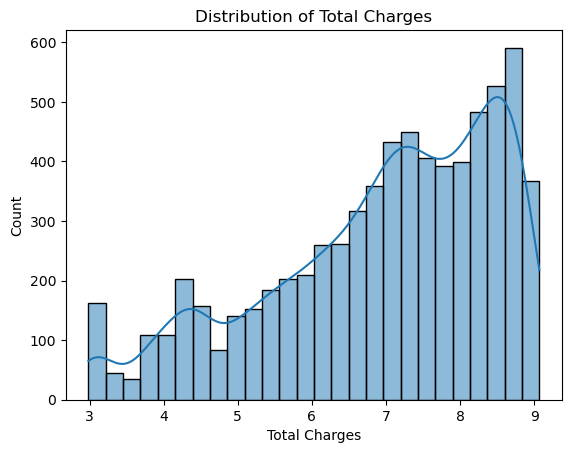

In [105]:
sns.histplot(df['TotalCharges'], kde=True)
plt.xlabel("Total Charges")
plt.ylabel('Count')
plt.title(f"Distribution of Total Charges")
plt.show()

### 3. Count Plot of Categorical Columns

### **Insights From the Plot**


### **_Gender_**

- Male and Female customer data is in nearly same number.
- Also the churn count is same.

### **_Senior Citizen_**

- Senior Citizen is a categorical column and most of the value is 0 meaning that most people are not senior citizens.
- Senior Citizens are in lesser Number in comparison.
- Also most senior citizens are in churn meaning they need more focus.

### **_Partner_**

- Most Customers has a partner.
- People who do not have a partner are in churn.
- This could be decresed by giving some special benefits to customers without a partner.

### **_Dependents_**

- Most Customers do not have dependents.
- People who do not have dependents are in churn.
- This could be decresed by giving some special benefits to customers without dependents.

### **_Phone Service_**

- Most Customers have Phone Service.

### **_Multiple Lines_**

- Most Customers do not have multiple lines.

### **_Multiple Lines_**

- Most Customers do not have online security.

### **_Online Backup_**

- Most Customers do not have online backup.
- Customers who do not have backup are in churn mostly.

### **_Device Production_**

- Most Customers do not have online backup.
- Customers who do not have protection are in churn mostly.

### **_Tech Support_**

- Most Customers do not have Tech Support.
- Customers who do not have Tech Support are in churn mostly.

In [106]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

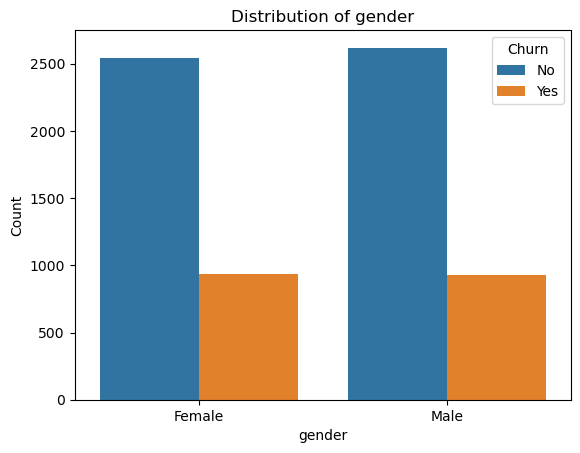

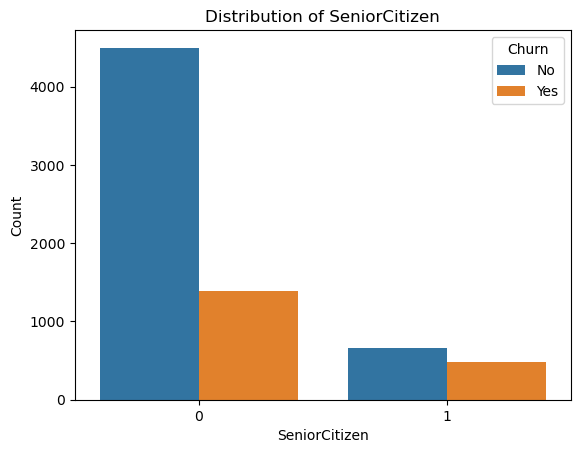

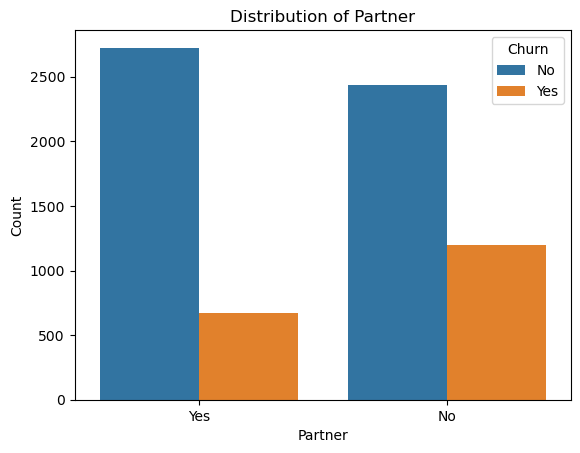

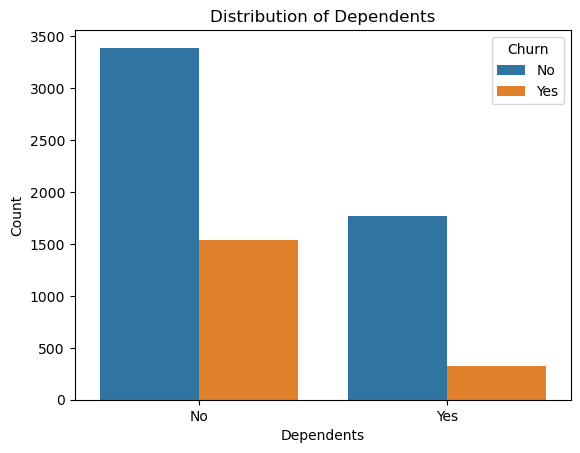

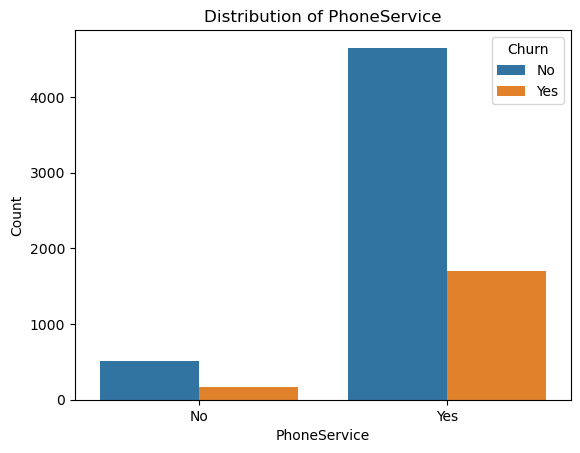

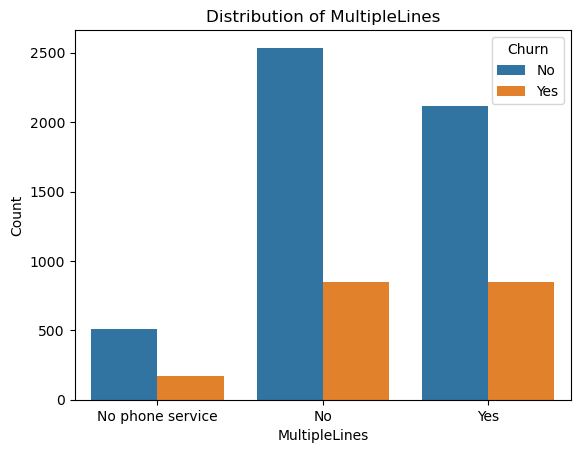

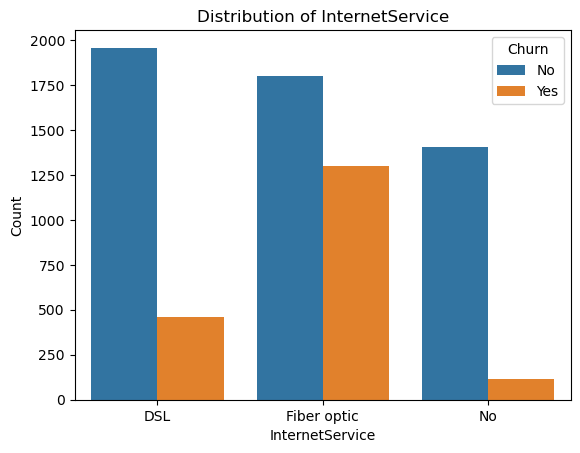

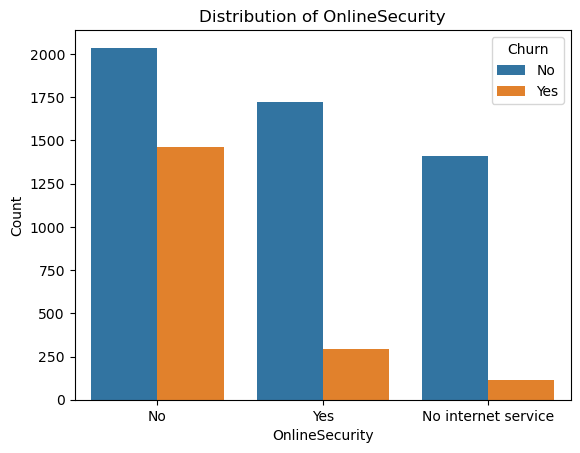

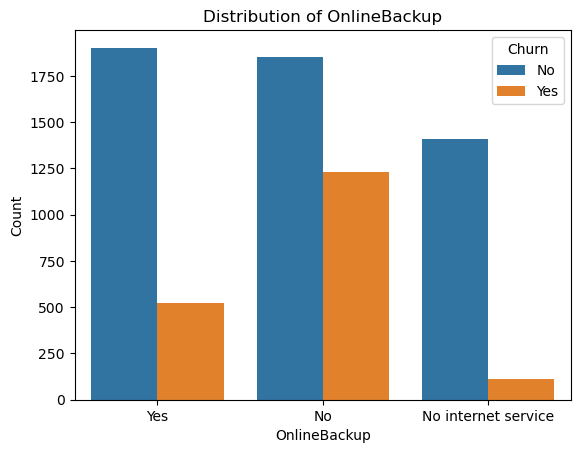

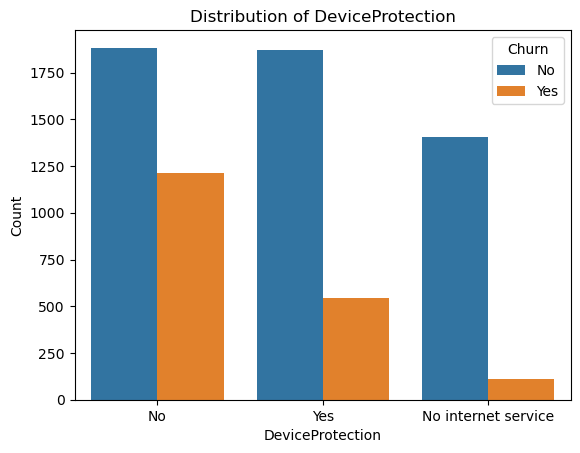

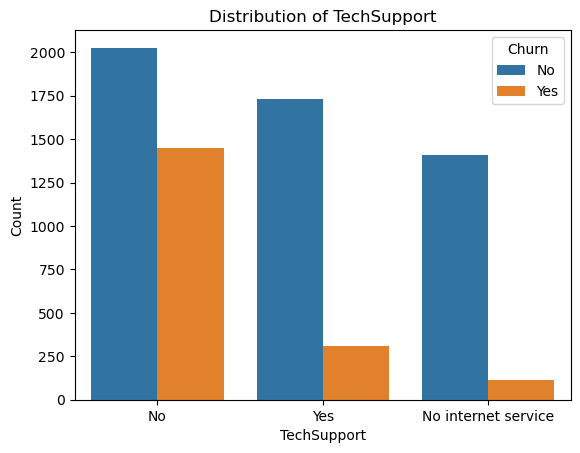

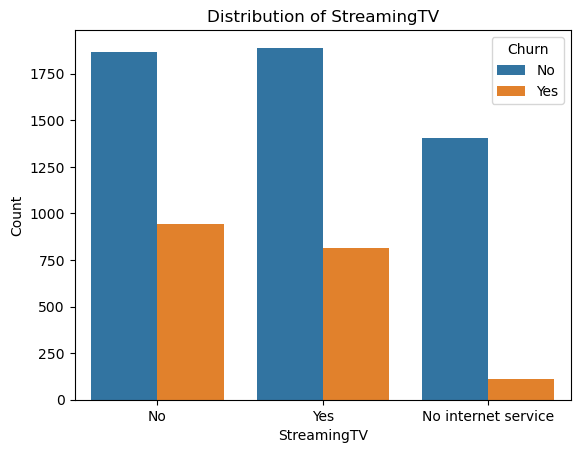

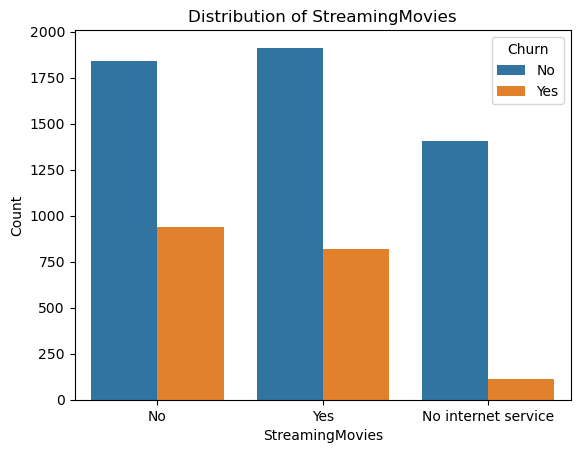

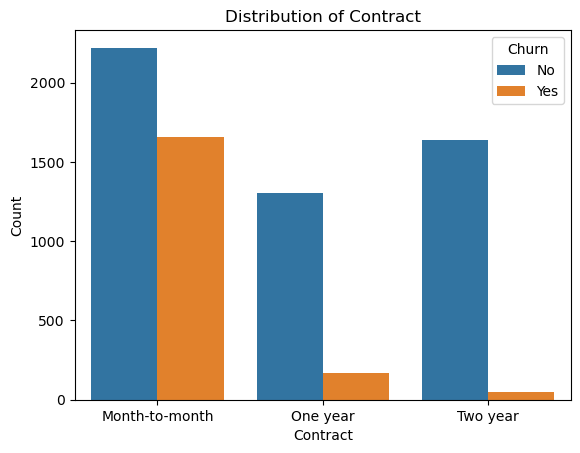

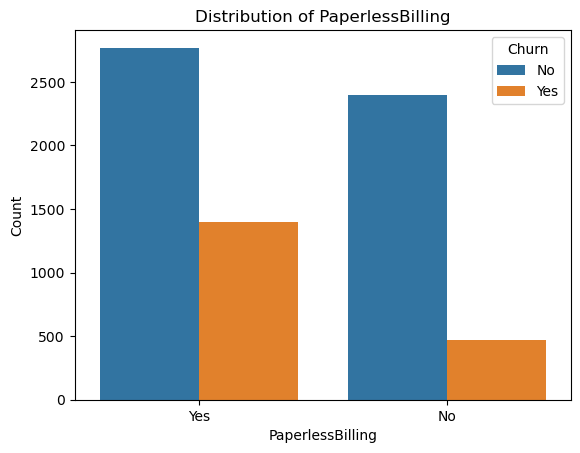

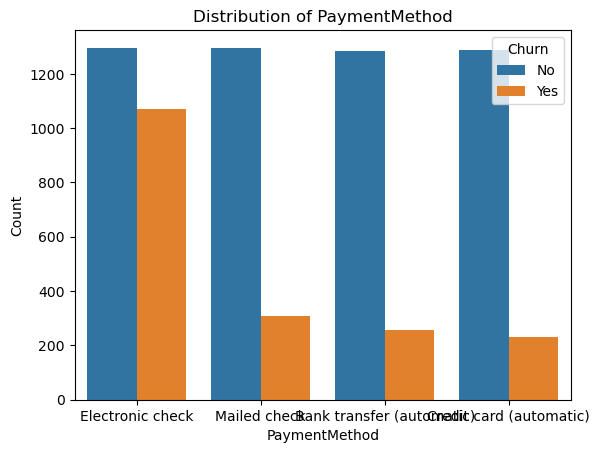

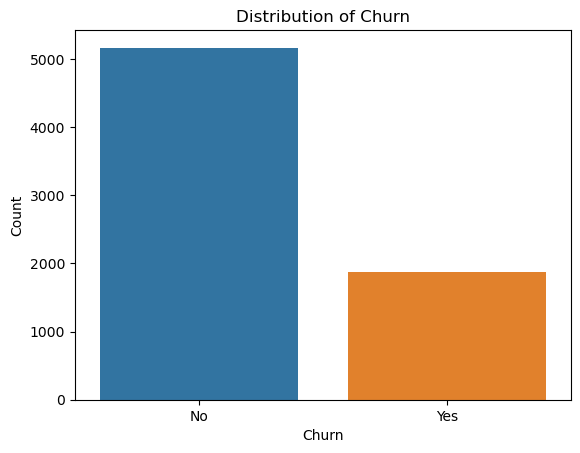

In [107]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'Churn']

for i in categorical_columns:
    
    if i != 'Churn':
        sns.countplot(x = df[i], data = df, hue = 'Churn')
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.title(f"Distribution of {i}")
        plt.show()
        
    else:
        sns.countplot(x = df[i], data = df)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.title(f"Distribution of {i}")
        plt.show()

## 2. Feature Engineering

### Removing Unnecessary Features

In [108]:
df.drop(columns = 'customerID', inplace = True)

### Since we saw that the distribution of class churn is unbalanced first we will balance it

In [109]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

### If we will use this for prediction then the model will predict most customers as not churn

#### So we will have equal values for both classses

In [110]:
print("Unique Categories in Churn are:\n")

print(df['Churn'].unique())

Unique Categories in Churn are:

['No' 'Yes']


In [111]:
# Balancing the dataset

# First we will extract the Churn and Not Churn Data
Not_Churn_data = df[df['Churn'] == 'No']
Churn_data = df[df['Churn'] == 'Yes']

# Checking the Shape of this Separated Data
print("Shape of Not Churn data after separating is: ",Not_Churn_data.shape)
print("\nShape of Churn data after separating is: ",Churn_data.shape)

Shape of Not Churn data after separating is:  (5163, 20)

Shape of Churn data after separating is:  (1869, 20)


In [112]:
# We are using the sample function for extracting data
# 1869 rows are selected because the number of risk data is 1869
# To ensure correct fitting of model we will take the same number of rows for both Churn and Not Churn Data

Not_Churn_Sample = Not_Churn_data.sample(n=1869)

# Now finally we will concatenate both the samples for Fraud and Not Fraud data
df = pd.concat([Not_Churn_Sample, Churn_data], axis=0)

# Now seeing the counts in the new dataframe
print("Number/Count of Churn and Not Churn Data values in Dataframe is:")
df['Churn'].value_counts()

Number/Count of Churn and Not Churn Data values in Dataframe is:


No     1869
Yes    1869
Name: Churn, dtype: int64

## 3. Data Preprocessing

### Encoding Categorical Columns

In [113]:
# Using scikit-learn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                       'PaymentMethod', 'Churn']


for i in categorical_columns:

    df[i] = label_encoder.fit_transform(df[i])

### Seeing Descriptive Statistics of Dataset after Encoding

In [114]:
print("Descriptive Statistics of Dataset after Encoding:\n")

df.describe()

Descriptive Statistics of Dataset after Encoding:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000,3738.000000
mean,0.501070,0.190209,0.438202,0.250401,27.803906,0.908507,0.965222,0.856340,0.659711,0.825040,0.822365,0.663456,0.962547,0.970037,0.504815,0.648208,1.629749,67.993004,6.740747,0.500000
std,0.500066,0.392518,0.496233,0.433302,24.100479,0.288347,0.952649,0.675235,0.847347,0.896217,0.895690,0.848842,0.912371,0.912648,0.763850,0.477593,1.022044,28.788691,1.612986,0.500067
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.400000,2.985682,0.000000
25%,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,45.550000,5.596104,0.000000
50%,1.000000,0.000000,0.000000,0.000000,21.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,74.650000,7.039332,0.500000
75%,1.000000,0.000000,1.000000,1.000000,49.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,90.837500,8.111909,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,9.069445,1.000000


### Normalizing Column Monthly Charges and Total Charges

In [115]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize 'MonthlyCharges' and 'TotalCharges' columns
df[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['MonthlyCharges', 'TotalCharges']])

### Making Correlation Matrix for dataset

In [116]:
import warnings
warnings.filterwarnings("ignore")

corr_mat = df.corr()

print("Correlation Matrix for Dataset is:\n")
print(corr_mat)

Correlation Matrix for Dataset is:

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.000356  0.017520    0.006173  0.029026   
SeniorCitizen    -0.000356       1.000000  0.011593   -0.225045  0.007254   
Partner           0.017520       0.011593  1.000000    0.432896  0.386110   
Dependents        0.006173      -0.225045  0.432896    1.000000  0.170547   
tenure            0.029026       0.007254  0.386110    0.170547  1.000000   
PhoneService     -0.017879       0.009579  0.018449    0.027066  0.017711   
MultipleLines     0.011874       0.156526  0.153382   -0.024924  0.338985   
InternetService  -0.000733      -0.008943 -0.006138    0.027864 -0.009361   
OnlineSecurity   -0.022507      -0.123141  0.145986    0.133748  0.340950   
OnlineBackup      0.011165      -0.012630  0.154386    0.092863  0.393585   
DeviceProtection  0.018945      -0.027935  0.167952    0.084991  0.370065   
TechSupport      -0.005455      -0.16361

### Visualizing Heat Map/ Correlation Plot for this dataset

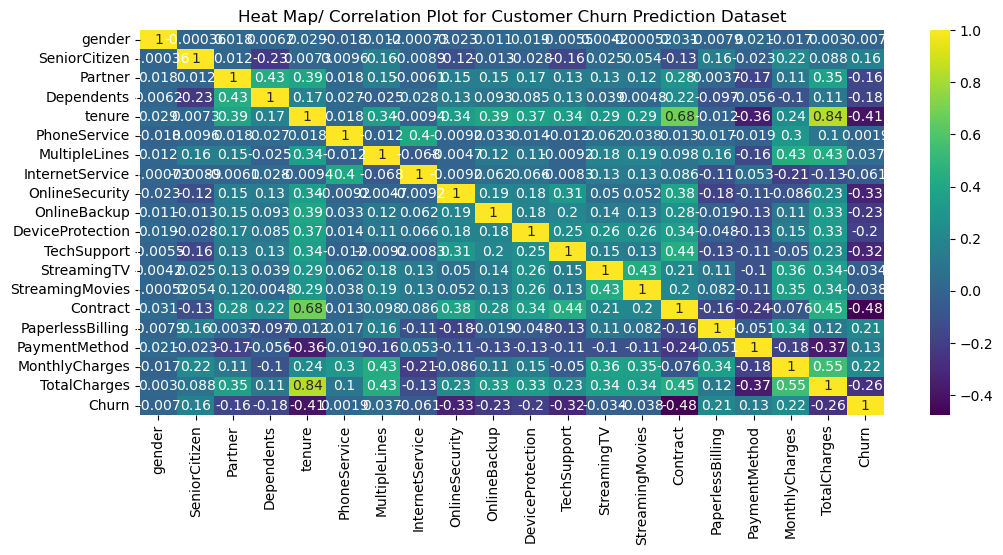

In [117]:
# Setting Figure Size
plt.figure(figsize = (12,5))
sns.heatmap(corr_mat, annot = True, cmap = 'viridis')

plt.title("Heat Map/ Correlation Plot for Customer Churn Prediction Dataset")
plt.show()

### Saving the Preprocessed Dataset

In [118]:
df.to_csv("Preprocessed_Customer_Prediction.csv", index = False)

## 4. Machine Learning Model Development

### Since the Data is Preprocessed now, we will begin with machine learning model.

### 4.1 Data Gathering
We have already gathered and preprocessed data so we can directly use it now.

In [121]:
# Reading CSV file
df = pd.read_csv("Preprocessed_Customer_Prediction.csv", index_col=None)

print("Dataset is:\n")

df.head(n = 7)

Dataset is:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,3,0.015446,0.282759,0
1,1,0,1,1,59,1,0,0,2,2,2,2,2,2,2,1,2,0.681116,0.915261,0
2,1,0,0,0,63,1,2,1,0,2,0,2,2,2,0,0,2,0.866966,0.957680,0
3,0,1,1,0,37,1,0,1,0,0,2,2,2,0,0,0,2,0.713503,0.844511,0
4,1,0,0,0,68,0,1,0,0,0,2,0,0,2,0,1,0,0.214250,0.813764,0
5,0,0,0,1,17,1,2,1,0,2,2,2,0,0,0,1,1,0.740409,0.717546,0
6,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,0,0.022422,0.256987,0


### 4.2 Splitting into input and output

In [129]:
# Input
X = df.drop(columns = ['Churn'], axis = 1)

# Output
Y = df['Churn']

X = X.values
Y = Y.values

# Seeing Shape of Input and Output
print("Shape of Input is:", X.shape)
print("\nShape of Output is:", Y.shape)

Shape of Input is: (3738, 19)

Shape of Output is: (3738,)


### 4.3 Splitting Between Testing and Training Data.

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8)

### 4.4 Choosing Algorithm and Training

Here we will create a function which will test all Supervised learning algorithms on this data.

In [131]:
# Importing Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Creating Object for Algorithms
# Create instances of classifiers using a dictionary
classifiers_dict = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

### 4.5 Training Model

In [132]:
# We have dictionary so we will directly use it

# Assuming you have a dictionary named classifiers_dict

for classifier_name, classifier_instance in classifiers_dict.items():
    classifier_instance.fit(x_train, y_train)
    print(f"Successfully Trained {classifier_name} Classifier.")

Successfully Trained K Nearest Neighbor Classifier.
Successfully Trained Support Vector Machine Classifier.
Successfully Trained Decision Tree Classifier Classifier.
Successfully Trained Naive Bayes Classifier Classifier.
Successfully Trained Random Forest Classifier Classifier.
Successfully Trained Logistic Regression Classifier.


## 5. Model Evaluation

In [133]:
# For Showing Heading in Jupyter Notebook
from IPython.display import display, HTML

# Importing Required Functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dictionary to store accuracies for each model
accuracy_dict = {}

for classifier_name, classifier_instance in classifiers_dict.items():

    # Display model name
    display(HTML(f"<h1 style='font-size:20 px;'>Evaluation Measures for Algorithm {classifier_name} are:</h2><br>"))

    # Training phase
    pred_train = classifier_instance.predict(x_train)

    # Training Accuracy and Classification report and Confusion Matrix
    display(HTML(f"<h2 style='font-size: 14 px'>Training Accuracy is: {accuracy_score(y_train, pred_train)*100} </h1><br>"))
    print("\nConfusion Matrix is:\n")
    print(confusion_matrix(y_train, pred_train))
    print("\nClassification Report is:\n")
    print(classification_report(y_train, pred_train))

    # Testing phase
    pred_test = classifier_instance.predict(x_test)

    # Testing Accuracy and Classification report and Confusion Matrix
    testing_accuracy = accuracy_score(y_test, pred_test) * 100
    display(HTML(f"<h2 style='font-size: 14 px'>Testing Accuracy is: {testing_accuracy} </h2><br>"))
    print("\nConfusion Matrix is:\n")
    print(confusion_matrix(y_test, pred_test))
    print("\nClassification Report is:\n")
    print(classification_report(y_test, pred_test))

    # Store the testing accuracy in the dictionary
    accuracy_dict[classifier_name] = testing_accuracy


Confusion Matrix is:

[[1127  358]
 [ 235 1270]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1485
           1       0.78      0.84      0.81      1505

    accuracy                           0.80      2990
   macro avg       0.80      0.80      0.80      2990
weighted avg       0.80      0.80      0.80      2990




Confusion Matrix is:

[[272 112]
 [ 80 284]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       384
           1       0.72      0.78      0.75       364

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748




Confusion Matrix is:

[[1028  457]
 [ 344 1161]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1485
           1       0.72      0.77      0.74      1505

    accuracy                           0.73      2990
   macro avg       0.73      0.73      0.73      2990
weighted avg       0.73      0.73      0.73      2990




Confusion Matrix is:

[[264 120]
 [ 72 292]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.79      0.69      0.73       384
           1       0.71      0.80      0.75       364

    accuracy                           0.74       748
   macro avg       0.75      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748




Confusion Matrix is:

[[1484    1]
 [   3 1502]]

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1505

    accuracy                           1.00      2990
   macro avg       1.00      1.00      1.00      2990
weighted avg       1.00      1.00      1.00      2990




Confusion Matrix is:

[[273 111]
 [139 225]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       384
           1       0.67      0.62      0.64       364

    accuracy                           0.67       748
   macro avg       0.67      0.66      0.66       748
weighted avg       0.67      0.67      0.66       748




Confusion Matrix is:

[[1043  442]
 [ 303 1202]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1485
           1       0.73      0.80      0.76      1505

    accuracy                           0.75      2990
   macro avg       0.75      0.75      0.75      2990
weighted avg       0.75      0.75      0.75      2990




Confusion Matrix is:

[[272 112]
 [ 56 308]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       384
           1       0.73      0.85      0.79       364

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.77       748
weighted avg       0.78      0.78      0.77       748




Confusion Matrix is:

[[1483    2]
 [   2 1503]]

Classification Report is:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1485
           1       1.00      1.00      1.00      1505

    accuracy                           1.00      2990
   macro avg       1.00      1.00      1.00      2990
weighted avg       1.00      1.00      1.00      2990




Confusion Matrix is:

[[288  96]
 [ 97 267]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.75      0.75      0.75       384
           1       0.74      0.73      0.73       364

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.74      0.74      0.74       748




Confusion Matrix is:

[[1083  402]
 [ 298 1207]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.78      0.73      0.76      1485
           1       0.75      0.80      0.78      1505

    accuracy                           0.77      2990
   macro avg       0.77      0.77      0.77      2990
weighted avg       0.77      0.77      0.77      2990




Confusion Matrix is:

[[286  98]
 [ 68 296]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.81      0.74      0.78       384
           1       0.75      0.81      0.78       364

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



### 5.1 Finding the Model with Highest accuracy

In [134]:
# Finding the model with the maximum testing accuracy
best_model = max(accuracy_dict, key=accuracy_dict.get)
display(HTML(f"<h3 style='font-size: 14 px'>The model with the Maximum Testing accuracy is: {best_model} with accuracy {accuracy_dict[best_model]}</h3>"))

### 5. 2 Implementing Hyperparameter Tuning

#### Creating Parameter Grid For each Model.
#### Since SVC will take much resources we are removing it.

In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Create instances of classifiers using a dictionary
classifiers_dict = {
    "K Nearest Neighbor": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression()
}

param_grid = {
    'K Nearest Neighbor': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},

    'Decision Tree Classifier': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    },

    'Naive Bayes Classifier': {},  # Naive Bayes doesn't have hyperparameters

    'Random Forest Classifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    },

    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [100, 200, 300],
    }
}

# Create a dictionary to store grid search results and best models
grid_search_results = {}

### 5.3 Looping through each classifier and giving the parameters and evaluating

In [136]:
# Importing Required Functions
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a dictionary to store grid search results and best models
grid_search_results = {}

# Loop through each classifier
for classifier_name, classifier_instance in classifiers_dict.items():

    # Display model name
    display(HTML(f"<h1 style='font-size:20 px;'>Grid Search and Evaluation Measures for Algorithm {classifier_name} are:</h2><br>"))

    # Set up GridSearchCV
    grid_search = GridSearchCV(classifier_instance, param_grid[classifier_name], scoring=make_scorer(accuracy_score), cv=5, n_jobs=-1)

    # Fit the model using GridSearchCV
    grid_search.fit(x_train, y_train)

    # Get the best model from GridSearchCV
    best_model = grid_search.best_estimator_

    # Store grid search results
    grid_search_results[classifier_name] = {
        'best_model': best_model,
        'grid_search': grid_search
    }

    # Display best parameters
    # Display best parameters without brackets
    best_params_str = ', '.join(f'{key}: {value}' for key, value in grid_search.best_params_.items())
    display(HTML(f"<h2 style='font-size: 14 px'>Best Parameters are: {best_params_str} </h2><br>"))


    # Display evaluation metrics for the best model
    pred_train = best_model.predict(x_train)
    display(HTML(f"<h2 style='font-size: 14 px'>Best Model Training Accuracy is: {accuracy_score(y_train, pred_train)*100} </h1><br>"))
    print("\nConfusion Matrix for Best Model on Training Data is:\n")
    print(confusion_matrix(y_train, pred_train))
    print("\nClassification Report for Best Model on Training Data is:\n")
    print(classification_report(y_train, pred_train))

    pred_test = best_model.predict(x_test)

    # Testing Accuracy and Classification report and Confusion Matrix
    testing_accuracy = accuracy_score(y_test, pred_test) * 100
    display(HTML(f"<h2 style='font-size: 14 px'>Best Model Testing Accuracy is: {testing_accuracy} </h2><br>"))
    print("\nConfusion Matrix for Best Model on Testing Data is:\n")
    print(confusion_matrix(y_test, pred_test))
    print("\nClassification Report for Best Model on Testing Data is:\n")
    print(classification_report(y_test, pred_test))



Confusion Matrix for Best Model on Training Data is:

[[1093  392]
 [ 241 1264]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1485
           1       0.76      0.84      0.80      1505

    accuracy                           0.79      2990
   macro avg       0.79      0.79      0.79      2990
weighted avg       0.79      0.79      0.79      2990




Confusion Matrix for Best Model on Testing Data is:

[[272 112]
 [ 80 284]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       384
           1       0.72      0.78      0.75       364

    accuracy                           0.74       748
   macro avg       0.74      0.74      0.74       748
weighted avg       0.75      0.74      0.74       748




Confusion Matrix for Best Model on Training Data is:

[[1208  277]
 [ 198 1307]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1485
           1       0.83      0.87      0.85      1505

    accuracy                           0.84      2990
   macro avg       0.84      0.84      0.84      2990
weighted avg       0.84      0.84      0.84      2990




Confusion Matrix for Best Model on Testing Data is:

[[264 120]
 [ 83 281]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       384
           1       0.70      0.77      0.73       364

    accuracy                           0.73       748
   macro avg       0.73      0.73      0.73       748
weighted avg       0.73      0.73      0.73       748




Confusion Matrix for Best Model on Training Data is:

[[1043  442]
 [ 303 1202]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.77      0.70      0.74      1485
           1       0.73      0.80      0.76      1505

    accuracy                           0.75      2990
   macro avg       0.75      0.75      0.75      2990
weighted avg       0.75      0.75      0.75      2990




Confusion Matrix for Best Model on Testing Data is:

[[272 112]
 [ 56 308]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.83      0.71      0.76       384
           1       0.73      0.85      0.79       364

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.77       748
weighted avg       0.78      0.78      0.77       748




Confusion Matrix for Best Model on Training Data is:

[[1210  275]
 [ 178 1327]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1485
           1       0.83      0.88      0.85      1505

    accuracy                           0.85      2990
   macro avg       0.85      0.85      0.85      2990
weighted avg       0.85      0.85      0.85      2990




Confusion Matrix for Best Model on Testing Data is:

[[292  92]
 [ 73 291]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       384
           1       0.76      0.80      0.78       364

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748




Confusion Matrix for Best Model on Training Data is:

[[1075  410]
 [ 282 1223]]

Classification Report for Best Model on Training Data is:

              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1485
           1       0.75      0.81      0.78      1505

    accuracy                           0.77      2990
   macro avg       0.77      0.77      0.77      2990
weighted avg       0.77      0.77      0.77      2990




Confusion Matrix for Best Model on Testing Data is:

[[282 102]
 [ 64 300]]

Classification Report for Best Model on Testing Data is:

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       384
           1       0.75      0.82      0.78       364

    accuracy                           0.78       748
   macro avg       0.78      0.78      0.78       748
weighted avg       0.78      0.78      0.78       748



### 5.4 Finding the Model with Highest accuracy after Hyperparameter Tuning

In [137]:
best_model_name = max(grid_search_results, key=lambda k: accuracy_score(y_test, grid_search_results[k]['best_model'].predict(x_test)))
best_model = grid_search_results[best_model_name]['best_model']
display(HTML(f"<h3 style='font-size: 14 px'>The model with the Maximum Testing accuracy after Hyperparameter Tuning is: {best_model_name} with accuracy {accuracy_score(y_test, best_model.predict(x_test))*100}</h3>"))

## 6. Predicting Churn

In [147]:
# Select a specific tuple (row) from the DataFrame for prediction
sample_tuple = df.iloc[0]  # We want to select the first tuple

# Drop the target variable column from the selected tuple
X_sample = sample_tuple.drop('Churn')

# Reshape the sample tuple to match the model's input requirements
X_sample_reshaped = X_sample.values.reshape(1, -1)

# Predict using the sample tuple
prediction = best_model.predict(X_sample_reshaped)

# Print prediction
print("Prediction:", prediction)

# Print actual target variable value for the sample tuple
actual_target = sample_tuple['Churn']
print("Actual Target:", actual_target)

Prediction: [0]
Actual Target: 0.0


## 7. Recommendations

### Some recommendations based on this model and EDA for reducing Customer Churn are:

## 1. **Senior Citizen Benefits** 

- As we saw in this dataset, less senior citizens are using this.
- Also the retention rate is very low meaning most senior citizens leave.
- To increase customer retention some special senior citizen benefits can be given.
- This could include some special discounts, messages or wishes.
- Some additional messaging and informational message can be sent for senior citizens to be able to use it more efficiently.
- Tech Support can also be given.

## 2. **Single User Benefits**

- As we saw in this dataset, more single users i.e users without partners are using this.
- To increase customer retention some special benefits can be given.
- This could include some special discounts, messages or wishes.
- Tech Support can also be given.

## 3. **Events**

- Informational events can be held so that users are able to use services more efficiently.
- Instead of mails it will be better to have direct conversations with users.

## 4. **Feedback**

- Customer feedback should be taken to understand the root cause.
- Dissatisfication analysis should be done.

## 5. **More Focus on Users with more time period with company**

- Such users are more valuable.
- Extra benefits can be given to those who have using it for more than 30-40 months.
- This will reduce churn.

## 6. **Using ML Modeling**

- Since we able to classify which users are churn using model we can use it to detect which users are more likely to churn.
- Such users can be given additional benefits to reduce churn.